# STA 141B Data & Web Technologies for Data Analysis

### Lecture 7, 10/24/23, APIs


### Announcements

 - HW 2 due this Friday
 - Groups are set

### Last week's topics

 - Concurrency
 - Exam

### Today's topics

- Final project
- Getting Data from the Web
- Hypertext Transfer Protocol
- Representational State Transfer
- iTunes API
- Caching
- API Keys
- Guardian API

### Resources
 - [iTunes Search API](https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/)
 - [Guardian API](https://open-platform.theguardian.com/documentation/)

### Final Project

You should work alone or with up to two partners. The
purpose of the project is to provide you with real data aquisition experience,
which includes:

* Posing questions / finding challenges
* Finding data sources
* Accessing the data 
* Processing the data 
* Exploring and visualizing the data
* Presenting your findings through writing

#### Getting Started

To narrow down your project to just one topic, think
about:

*   What questions does your topic address or what problems does your topic
    solve? Why and to whom are these meaningful?
*   What's challenging about your topic?
*   Are there credible, **public** datasets available to explore the topic?
    See below for some suggested data sources.
*   Is a 6-week project long enough to explore the topic reasonably well?

As inspiration and an example of what can be done with public datasets, see [I
Quant NY][NY]. 

[NY]: http://iquantny.tumblr.com/post/144197004989/the-nypd-was-systematically-ticketing-legally


#### Proposal

Your group should submit a 1-2 page project proposal by
__November 4th 11:59pm__. Your proposal should address:

*   What's the topic of your project? What question(s) will you attempt to
    answer or what problems will you attempt to solve? Why and to whom are
    these meaningful?

*   What data source(s) will your team use? Briefly describe each data source
    and explain how you think you will use it. Provide a link for each data
    source. This is a check to make sure that there is actually data available
    for your topic. If you ultimately decide not to use some of the data
    sources, or find additional data sources later, that's okay.

*   What makes your project challenging? Consider that you will have about 6
    weeks to work on the project. 

The proposal is your best opportunity to get feedback on your project. Make
sure it's clear and addresses the questions above. You can also use the
proposal to tell us about any other comments or concerns you have about your
project topic. You do not need to present any data analyses in the proposal.

The proposal will be graded satisfactory/unsatisfactory. This will not count for your final grade. 
Your priority should be working on the project itself; don't spend more than a few hours working on
the proposal. 
The proposal is to be submitted to Canvas. 

#### Grading criteria

The final report is due on __December 15__. The report should be 8-10 pages
including writing and visualizations, but excluding code. 

We will score your report according to:

* Reporting (20%): Are there clear research questions that you asked, and did you
    address these in an orderly fashion? Did you make well justified
    conclusions? Is your project sensible and easy to read?
* Data Aquisition and Processing (50%):  How much work was necessary to get your data,
    which includes web APIs, web scraping, and reading data from files. 
    Did you process the data in an clear, efficient,
    and organized way? Do you join multiple data sources appropriately? Did you
    work with unstructured data? Did you store your processed data in an
    efficient way, using well-thought-out data structures or a database?
* Vizualisation and Methodology (20%): 
    Do your visualizations follow best practices? Do they support the hypothesis? 
    Is your methodology appropriate? 
    Does this give insight to your project? Are the methods tailored to your
    specific topic and data (not generic or off-the-shelf)?
* Code (10%): Is your code well-organized and easy to read? Is your code
    reproducible? Is your code documented? Is your code reasonably efficient?
    Did you use appropriate data structures and algorithms?

Grading scales:

Grade            | Points
------------     | -------
Good             | 10
Satisfactory     | 8
Poor             | 6
Partial Work     | 4
No Work          | 0

### Getting Data from the Web

We consider three ways one can get data from the web, from most to least convenient:
1. Direct download
2. API
3. Scraping

Always look for a direct download first!

##### Difference between web scraping and API

_Web Scraping_ refers to the process of extracting data from a website or specific webpage.

API stands for _application programming interface_ (API) is a collection of functions and data structures for communicating with other software. For instance, whenever you use a Python package, you're using the API created by the package's developers.

The goal of both web scraping and (web) APIs is to access web data.

Web scraping allows you to extract data from any website through the use of web scraping software. On the other hand, APIs give you direct access to the data you want.

Websites sometimes provide an API so that programmers can access content without web scraping. 

### Hypertext Transfer Protocol

The hypertext transfer protocol (HTTP) is a set of rules for communicating over the internet.

For example, your web browser uses HTTP every time you visit a web page. The browser makes a _request_ to the server for the page, and if nothing goes wrong, the server _responds_ with the page. If you have Firefox or Chrome, you can inspect these requests with your browser's web developer tools (Windows: <kbd>Ctrl</kbd> + <kbd>i</kbd>; MacOS: <kbd>&#8984;</kbd> + <kbd>&#8997;</kbd> + <kbd>i</kbd>).

Several [different kinds of HTTP requests](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods) are possible. Think of these as the different "verbs" you can use when communicating in HTTP.

Many protocols exist for communicating over the internet. For instance, you may have heard of _file transfer protocol_ (FTP) for transferring files, or _simple mail transfer protocol_ (SMTP) for sending/receiving email. However, web APIs almost always use HTTP.

A response to an HTTP request always includes a status code that summarizes whether the request was successful. Wikipedia has a full [list of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). Generally,

* 200-299: Your request succeeded.
* 300-399: You need to take further action to complete the request.
* 400-499: Your request wasn't valid (you made a mistake). You've probably seen 404 before!
* 500-599: Your request failed (the server made a mistake).

### Representational State Transfer 

The most popular kind of web API is a _representational state transfer_ (REST) API. The API needs to meet the following architectural requirements to be considered a REST API:

- Client-server: REST applications have a server that manages application data and state. 
- Stateless: Servers don’t maintain client state, clients manage their own application state. The client’s requests to the server contain all the information required to process them.
- Cacheable: servers must mark their responses as cacheable or not. Systems and clients can cache responses when convenient to improve performance. 
- Uniform interface: This is REST’s most well-known feature or rule. 

The URL with which we can talk to the server is sometimes called *endpoint*. 

### iTunes API

We use the iTunes API at `https://itunes.apple.com/search`, see [documentation](https://developer.apple.com/library/archive/documentation/AudioVideo/Conceptual/iTuneSearchAPI/Searching.html#//apple_ref/doc/uid/TP40017632-CH5-SW1). 

When you first use a web API, check the documentation to find out what the endpoints are and what kind of HTTP requests to use. If the documentation doesn't mention what kind of HTTP request to use, then GET is usually the right choice.

#### Making Requests

Python's `requests` package provides functions for making HTTP requests. Let's use the endpoint we learned from the iTunes API.

In [2]:
import requests

The syntax for the `requests` package is `response = requests.get("WEBSITE ADDRESS")`. 

#### Query Strings

Most of the functions we use have parameters, and you can pass arguments for those parameters when you call a function.

Endpoints in REST APIs work the same way, but the syntax is different. You can pass arguments by adding `?PARAMETER=ARGUMENT` to the end of the URL. Parameter and argument pairs are separated by `&`. This syntax is called a _query string_.

The search endpoint is `https://itunes.apple.com/search`, and the documentation lists several parameters. We can use `requests` to build the query string automatically.

Lets answer the question: How many albums of *Beyoncé* are on iTunes? 

In [3]:
response = requests.get("https://itunes.apple.com/search", params = {
        "term": "beyonce", # add multiple terms via +
        "media": "music",
        "entity": "album",
        "attribute": "artistTerm", # check iTunes docs
        "country": "US", 
        "limit": "1"
    })

In [4]:
type(response)

requests.models.Response

In [5]:
response.url

'https://itunes.apple.com/search?term=beyonce&media=music&entity=album&attribute=artistTerm&country=US&limit=1'

In [6]:
response

<Response [200]>

You can have `requests` check the status for you with the `.raise_for_status()` method.

In [7]:
response.raise_for_status()

In [8]:
response.url

'https://itunes.apple.com/search?term=beyonce&media=music&entity=album&attribute=artistTerm&country=US&limit=1'

In [17]:
response = requests.get("https://itunes.apple.com/search", params = {
        "term": "beyonce", 
        "media": "music",
        "entity": "album",
        "attribute": "artistTerm", # artistsTerm is no valid attribute! 
        "country": "US", 
        "limit": "200"
    })

Once you have the response, now what? Where's the data? Different web APIs use different formats. Again, see the documentation. Two common formats are:

 - _JavaScript Object Notation_ (JSON): JSON looks and works a lot like Python lists and dictionaries. Lists are surrounded with `[ ]`, and dictionaries are surrounded with `{ }`. There are many Python libraries for reading JSON into lists and dictionaries. Jupyter notebooks are an example of a file in JSON format.

 - _eXtensible Markup Language_ (XML): XML uses "tags" denoted by `< >` to mark up sections of text. We'll learn more about XML when we learn about web scraping, since XML is very similar to hypertext markup language (HTML), the language used to build web pages.

The iTunes returns data in JSON format (derived from JavaScript). We can inspect the raw content (bytes) of a response with the `.content` attribute. If we know the response is in a text format, we can use `.text` to see the content as an ordinary Python string.

In [18]:
response.text

'\n\n\n{\n "resultCount":110,\n "results": [\n{"wrapperType":"collection", "collectionType":"Album", "artistId":1419227, "collectionId":780330041, "artistName":"Beyoncé", "collectionName":"BEYONCÉ", "collectionCensoredName":"BEYONCÉ", "artistViewUrl":"https://music.apple.com/us/artist/beyonc%C3%A9/1419227?uo=4", "collectionViewUrl":"https://music.apple.com/us/album/beyonc%C3%A9/780330041?uo=4", "artworkUrl60":"https://is1-ssl.mzstatic.com/image/thumb/Features4/v4/dc/ca/29/dcca295f-851e-5faf-a3b4-030965fa80f2/dj.jyrlgxlq.jpg/60x60bb.jpg", "artworkUrl100":"https://is1-ssl.mzstatic.com/image/thumb/Features4/v4/dc/ca/29/dcca295f-851e-5faf-a3b4-030965fa80f2/dj.jyrlgxlq.jpg/100x100bb.jpg", "collectionPrice":15.99, "collectionExplicitness":"explicit", "contentAdvisoryRating":"Explicit", "trackCount":33, "copyright":"℗ 2013 Columbia Records, a Division of Sony Music Entertainment", "country":"USA", "currency":"USD", "releaseDate":"2013-12-13T08:00:00Z", "primaryGenreName":"Pop"}, \n{"wrapperTy

Since the response we got is in JSON format, we'd like to convert the string to lists and dictionaries. The `requests` package provides a method `.json()` to do this.

In [22]:
result = response.json()
result

{'resultCount': 110,
 'results': [{'wrapperType': 'collection',
   'collectionType': 'Album',
   'artistId': 1419227,
   'collectionId': 780330041,
   'artistName': 'Beyoncé',
   'collectionName': 'BEYONCÉ',
   'collectionCensoredName': 'BEYONCÉ',
   'artistViewUrl': 'https://music.apple.com/us/artist/beyonc%C3%A9/1419227?uo=4',
   'collectionViewUrl': 'https://music.apple.com/us/album/beyonc%C3%A9/780330041?uo=4',
   'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Features4/v4/dc/ca/29/dcca295f-851e-5faf-a3b4-030965fa80f2/dj.jyrlgxlq.jpg/60x60bb.jpg',
   'artworkUrl100': 'https://is1-ssl.mzstatic.com/image/thumb/Features4/v4/dc/ca/29/dcca295f-851e-5faf-a3b4-030965fa80f2/dj.jyrlgxlq.jpg/100x100bb.jpg',
   'collectionPrice': 15.99,
   'collectionExplicitness': 'explicit',
   'contentAdvisoryRating': 'Explicit',
   'trackCount': 33,
   'copyright': '℗ 2013 Columbia Records, a Division of Sony Music Entertainment',
   'country': 'USA',
   'currency': 'USD',
   'releaseDate': '20

In [23]:
type(result)

dict

In [24]:
result["results"]

[{'wrapperType': 'collection',
  'collectionType': 'Album',
  'artistId': 1419227,
  'collectionId': 780330041,
  'artistName': 'Beyoncé',
  'collectionName': 'BEYONCÉ',
  'collectionCensoredName': 'BEYONCÉ',
  'artistViewUrl': 'https://music.apple.com/us/artist/beyonc%C3%A9/1419227?uo=4',
  'collectionViewUrl': 'https://music.apple.com/us/album/beyonc%C3%A9/780330041?uo=4',
  'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Features4/v4/dc/ca/29/dcca295f-851e-5faf-a3b4-030965fa80f2/dj.jyrlgxlq.jpg/60x60bb.jpg',
  'artworkUrl100': 'https://is1-ssl.mzstatic.com/image/thumb/Features4/v4/dc/ca/29/dcca295f-851e-5faf-a3b4-030965fa80f2/dj.jyrlgxlq.jpg/100x100bb.jpg',
  'collectionPrice': 15.99,
  'collectionExplicitness': 'explicit',
  'contentAdvisoryRating': 'Explicit',
  'trackCount': 33,
  'copyright': '℗ 2013 Columbia Records, a Division of Sony Music Entertainment',
  'country': 'USA',
  'currency': 'USD',
  'releaseDate': '2013-12-13T08:00:00Z',
  'primaryGenreName': 'Pop'},


In [25]:
import pandas as pd
results = pd.DataFrame(result['results'])
results

,wrapperType,collectionType,artistId,collectionId,artistName,collectionName,collectionCensoredName,artistViewUrl,collectionViewUrl,artworkUrl60,...,collectionPrice,collectionExplicitness,contentAdvisoryRating,trackCount,copyright,country,currency,releaseDate,primaryGenreName,amgArtistId
0,collection,Album,1419227,780330041,Beyoncé,BEYONCÉ,BEYONCÉ,https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/beyonc%C3%A9/...,https://is1-ssl.mzstatic.com/image/thumb/Featu...,...,15.99,explicit,Explicit,33,"℗ 2013 Columbia Records, a Division of Sony Mu...",USA,USD,2013-12-13T08:00:00Z,Pop,NaN
1,collection,Album,1419227,626204707,Beyoncé,4 (Expanded Edition),4 (Expanded Edition),https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/4-expanded-ed...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,11.99,notExplicit,NaN,14,"℗ 2011, 2012 Columbia Records, a Division of S...",USA,USD,2013-03-29T07:00:00Z,Pop,NaN
2,collection,Album,1419227,201274359,Beyoncé,Dangerously in Love,Dangerously in Love,https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/dangerously-i...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,12.99,notExplicit,NaN,15,"℗ 2003 J Records, 2003 Sony Music Entertainmen...",USA,USD,2003-06-24T07:00:00Z,Pop,NaN
3,collection,Album,1419227,296016891,Beyoncé,I AM...SASHA FIERCE,I AM...SASHA FIERCE,https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/i-am-sasha-fi...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,9.99,notExplicit,NaN,12,℗ 2008 SONY BMG MUSIC ENTERTAINMENT,USA,USD,2008-11-12T08:00:00Z,Pop,NaN
4,collection,Album,1419227,261707051,Beyoncé,B'Day (Deluxe Edition),B'Day (Deluxe Edition),https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/bday-deluxe-e...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,16.99,notExplicit,NaN,23,"℗ 2006, 2007 SONY BMG MUSIC ENTERTAINMENT",USA,USD,2007-05-29T07:00:00Z,Pop,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,collection,Album,1419227,1309050838,Beyoncé,Partition - Single,Partition - Single,https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/partition-sin...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,cleaned,Clean,1,"℗ 2013 Columbia Records, a Division of Sony Mu...",USA,USD,2014-03-18T07:00:00Z,Pop,NaN
106,collection,Album,1419227,1635595046,Beyoncé,BREAK MY SOUL - Single,BREAK MY SOUL - Single,https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/break-my-soul...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,notExplicit,NaN,3,"℗ 2022 Parkwood Entertainment LLC, under exclu...",USA,USD,2022-07-22T07:00:00Z,Pop,NaN
107,collection,Album,1419227,1309083862,Beyoncé,Beyoncé - Single,Beyoncé - Single,https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/beyonc%C3%A9-...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,explicit,Explicit,2,"℗ 2013 Columbia Records, a Division of Sony Mu...",USA,USD,2013-12-20T08:00:00Z,Pop,NaN
108,collection,Album,1419227,1460430561,Beyoncé,Lemonade,Lemonade,https://music.apple.com/us/artist/beyonc%C3%A9...,https://music.apple.com/us/album/lemonade/1460...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,explicit,Explicit,13,"℗ 2019 Parkwood Entertainment LLC, under exclu...",USA,USD,2016-04-23T07:00:00Z,Pop,NaN


In [26]:
results.shape

(110, 21)

### Caching

Making an HTTP request is not free! It has a real cost in CPU time and also cash. Server administrators will not appreciate it if you make too many requests or make requests too quickly. So:

* Use `time.sleep()` to slow down any requests you make in a loop. Aim for no more than 20-30 requests per second.
* Install and use the `requests_cache` package to avoid downloading extra data when you make the same request twice.

Failing to be polite can get you banned from websites!

We can use `sleep` from `time` to suspend any operation for the passed number of seconds. 

In [27]:
import time 
print(time.ctime())
time.sleep(0.05)
print(time.ctime())

Sun Oct 22 23:18:56 2023
Sun Oct 22 23:18:56 2023


A possible problem for time consuming requests is that data is requested multiple times. This can be avoided by using a cache. When the request is made, it first checks the cache. Only if the data is not found there, the data is pulled from the server and copied into the cache. 

We cache our search results with `requests_cache` ([docs](https://requests-cache.readthedocs.io/en/v0.9.6/user_guide.html)). 

In [28]:
import requests
session = requests.Session() 
for i in range(10):
    session.get('http://httpbin.org/delay/1') # this endpoints delays by one second

In [29]:
import requests_cache
session = requests_cache.CachedSession('demo_cache')
for i in range(10):
    res = session.get('http://httpbin.org/delay/1')

In [30]:
res.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate, br", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.1", \n    "X-Amzn-Trace-Id": "Root=1-65361062-39082ce55e48e8ac4f829cc2"\n  }, \n  "origin": "98.252.120.250", \n  "url": "http://httpbin.org/delay/1"\n}\n'

### API Keys

Many APIs use a _key_ or _token_ to identify the user. For instance, The Guardian, a British newspaper, provides a [web API](https://open-platform.theguardian.com/) to access their news articles. You need an API key to use their web APIs. You can get one for free [here](https://bonobo.capi.gutools.co.uk/register/developer).

#### Storing API Keys

Your API key is private and your responsibility. Treat it like a password. Keep it secret! 

In order to keep your API key separate from your code:
1. Save the API key in a text file.
2. Use Python to load the API key into a variable.

Python's built-in `open()` function opens a file, and the `.readline()` method reads a line from a file. Often you'll see these used with `with`, which automatically closes the file at the end of the block:

In [31]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

In [32]:
key = read_key("../keys/guardian.txt") # Don't print out your actual API key

In [33]:
type(key)

str

Now you can use the `key` variable anywhere you need the actual API key.

#### Querying The Guardian

We've got our key, so let's use The Guardian API. 

We want to answer the question whether Biden or Trump get more newspaper coverage in the days leading up to the 2020 U.S. presidential election. Let's start by trying to get all of the articles about one of the candidates.

In [37]:
response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": "Biden",
        "from-date": "2020-11-01",
        "to-date": "2020-11-10",
        "page-size": 50,
        "order_by": "newest",
        "page": 1
    }) # try page 12

In [38]:
response.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [39]:
response.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 475,
  'startIndex': 1,
  'pageSize': 50,
  'currentPage': 1,
  'pages': 10,
  'orderBy': 'relevance',
  'results': [{'id': 'australia-news/2020/nov/05/biden-edges-closer-to-victory',
    'type': 'article',
    'sectionId': 'australia-news',
    'sectionName': 'Australia news',
    'webPublicationDate': '2020-11-05T05:38:22Z',
    'webTitle': 'US election briefing for Australia: Biden edges closer to victory',
    'webUrl': 'https://www.theguardian.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
    'apiUrl': 'https://content.guardianapis.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'politics/2020/nov/10/johnsons-biden-win-tweet-contains-hidden-trump-congratulations',
    'type': 'article',
    'sectionId': 'politics',
    'sectionName': 'Politics',
    'webPublicationDate': '2020-11-10T13:19:16Z'

In [40]:
import time
def get_articles(q, page = 1, from_date = "2020-11-01"):
    time.sleep(0.05) 
    response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": q,
        "from-date": from_date,
        "to-date": "2020-11-10",
        "page-size": 50,
        "order_by": "newest", 
        "page": page
    })
    response.raise_for_status()
    return response.json()["response"]

In [41]:
biden = get_articles("Biden")

In [42]:
biden

{'status': 'ok',
 'userTier': 'developer',
 'total': 475,
 'startIndex': 1,
 'pageSize': 50,
 'currentPage': 1,
 'pages': 10,
 'orderBy': 'relevance',
 'results': [{'id': 'australia-news/2020/nov/05/biden-edges-closer-to-victory',
   'type': 'article',
   'sectionId': 'australia-news',
   'sectionName': 'Australia news',
   'webPublicationDate': '2020-11-05T05:38:22Z',
   'webTitle': 'US election briefing for Australia: Biden edges closer to victory',
   'webUrl': 'https://www.theguardian.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
   'apiUrl': 'https://content.guardianapis.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
   'isHosted': False,
   'pillarId': 'pillar/news',
   'pillarName': 'News'},
  {'id': 'politics/2020/nov/10/johnsons-biden-win-tweet-contains-hidden-trump-congratulations',
   'type': 'article',
   'sectionId': 'politics',
   'sectionName': 'Politics',
   'webPublicationDate': '2020-11-10T13:19:16Z',
   'webTitle': "Johnson's Biden wi

In [43]:
pages = biden["pages"]
pages

10

In [44]:
pageSize = biden["pageSize"]
pageSize

50

In [45]:
currentPage = biden["currentPage"]
currentPage

1

In [46]:
results = biden["results"]
for p in range(2, pages + 1):
    results += get_articles("biden", p)["results"]

In [47]:
results

[{'id': 'australia-news/2020/nov/05/biden-edges-closer-to-victory',
  'type': 'article',
  'sectionId': 'australia-news',
  'sectionName': 'Australia news',
  'webPublicationDate': '2020-11-05T05:38:22Z',
  'webTitle': 'US election briefing for Australia: Biden edges closer to victory',
  'webUrl': 'https://www.theguardian.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
  'apiUrl': 'https://content.guardianapis.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'politics/2020/nov/10/johnsons-biden-win-tweet-contains-hidden-trump-congratulations',
  'type': 'article',
  'sectionId': 'politics',
  'sectionName': 'Politics',
  'webPublicationDate': '2020-11-10T13:19:16Z',
  'webTitle': "Johnson's Biden win tweet contains hidden Trump congratulations",
  'webUrl': 'https://www.theguardian.com/politics/2020/nov/10/johnsons-biden-win-tweet-contains-hidden-trump-congratulations',
  'a

In [48]:
type(results)

list

In [49]:
df = pd.DataFrame(results)

In [50]:
df.shape

(475, 11)

In [51]:
df.tail()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
470,world/live/2020/nov/10/coronavirus-live-news-w...,liveblog,world,World news,2020-11-10T23:55:55Z,Greek football players attend 'coronavirus par...,https://www.theguardian.com/world/live/2020/no...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News
471,world/live/2020/nov/06/coronavirus-live-news-u...,liveblog,world,World news,2020-11-07T00:21:25Z,"France reports record 60,486 new cases; Russia...",https://www.theguardian.com/world/live/2020/no...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News
472,business/live/2020/nov/10/uk-unemployment-redu...,liveblog,business,Business,2020-11-10T17:14:20Z,FTSE 100 vaccine rally continues; UK unemploym...,https://www.theguardian.com/business/live/2020...,https://content.guardianapis.com/business/live...,False,pillar/news,News
473,australia-news/live/2020/nov/02/australia-coro...,liveblog,australia-news,Australia news,2020-11-02T08:27:07Z,Ministers pay tribute to Christine Holgate – a...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,pillar/news,News
474,world/live/2020/nov/03/vienna-austria-synagogu...,liveblog,world,World news,2020-11-03T13:32:50Z,Vienna shooting: fourth victim dies as police ...,https://www.theguardian.com/world/live/2020/no...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News


In [52]:
df["webPublicationDate"] = pd.to_datetime(df["webPublicationDate"])

In [53]:
type(df["webPublicationDate"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [54]:
df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,australia-news/2020/nov/05/biden-edges-closer-...,article,australia-news,Australia news,2020-11-05 05:38:22+00:00,US election briefing for Australia: Biden edge...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,False,pillar/news,News
1,politics/2020/nov/10/johnsons-biden-win-tweet-...,article,politics,Politics,2020-11-10 13:19:16+00:00,Johnson's Biden win tweet contains hidden Trum...,https://www.theguardian.com/politics/2020/nov/...,https://content.guardianapis.com/politics/2020...,False,pillar/news,News
2,us-news/2020/nov/08/donald-trump-concede-legal...,article,us-news,US news,2020-11-08 19:39:23+00:00,Republicans back Trump challenge to Biden elec...,https://www.theguardian.com/us-news/2020/nov/0...,https://content.guardianapis.com/us-news/2020/...,False,pillar/news,News
3,us-news/live/2020/nov/07/us-election-joe-biden...,liveblog,us-news,US news,2020-11-08 10:04:24+00:00,Biden addresses Americans after victory – as i...,https://www.theguardian.com/us-news/live/2020/...,https://content.guardianapis.com/us-news/live/...,False,pillar/news,News
4,world/2020/nov/09/monday-briefing-biden-to-mak...,article,world,World news,2020-11-09 06:24:26+00:00,Monday briefing: Biden to make Covid top priority,https://www.theguardian.com/world/2020/nov/09/...,https://content.guardianapis.com/world/2020/no...,False,pillar/news,News


In [58]:
date = df["webPublicationDate"].dt
date

In [59]:
date.day_name()

0      Thursday
1       Tuesday
2        Sunday
3        Sunday
4        Monday
         ...   
470     Tuesday
471    Saturday
472     Tuesday
473      Monday
474     Tuesday
Name: webPublicationDate, Length: 475, dtype: object

In [60]:
dates = pd.DataFrame({"day": date.day, "day_name": date.day_name()})

In [61]:
dates

,day,day_name
0,5,Thursday
1,10,Tuesday
2,8,Sunday
3,8,Sunday
4,9,Monday
...,...,...
470,10,Tuesday
471,7,Saturday
472,10,Tuesday
473,2,Monday


In [62]:
dates.groupby(["day", "day_name"]).size()

day  day_name 
1    Sunday       29
2    Monday       26
3    Tuesday      49
4    Wednesday    60
5    Thursday     38
6    Friday       43
7    Saturday     51
8    Sunday       71
9    Monday       58
10   Tuesday      50
dtype: int64

Write it as a function

In [63]:
def get_articles(q, page = 1):
    response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": q,
        "from-date": "2020-11-01",
        "to-date": "2020-11-10",
        "page-size": 50,
        "page": page
    })
    response.raise_for_status()
    return response.json()["response"]

In [64]:
def get_all_articles(q, time_sleep = 0.05):
    # Get the first page, and find out how many pages there are.
    candidate = get_articles(q)
    pages = candidate["pages"]

    # Loop over remaining pages.
    results = candidate["results"]
    for p in range(2, pages + 1):
        results += get_articles(q, p)["results"]
        time.sleep(time_sleep)

    # Convert the articles to data frame, and the date column to a date.
    df = pd.DataFrame(results)
    df["webPublicationDate"] = pd.to_datetime(df["webPublicationDate"])
    
    # Get the day and day name, then count them.
    date = df["webPublicationDate"].dt
    dates = pd.DataFrame({"day": date.day, "day_name": date.day_name()})
    return dates.groupby(["day", "day_name"]).size()

In [65]:
biden=get_all_articles("Biden")
biden

day  day_name 
1    Sunday       29
2    Monday       26
3    Tuesday      46
4    Wednesday    60
5    Thursday     41
6    Friday       45
7    Saturday     51
8    Sunday       69
9    Monday       59
10   Tuesday      49
dtype: int64

In [66]:
biden.head(10)

day  day_name 
1    Sunday       29
2    Monday       26
3    Tuesday      46
4    Wednesday    60
5    Thursday     41
6    Friday       45
7    Saturday     51
8    Sunday       69
9    Monday       59
10   Tuesday      49
dtype: int64

In [67]:
trump=get_all_articles("Trump")
trump

day  day_name 
1    Sunday       46
2    Monday       39
3    Tuesday      56
4    Wednesday    64
5    Thursday     48
6    Friday       52
7    Saturday     57
8    Sunday       75
9    Monday       52
10   Tuesday      55
dtype: int64

In [68]:
df = pd.DataFrame([biden,trump]).T
df = df.rename(columns={0: 'Biden', 1: 'Trump'})
df = df.reset_index()
df

,day,day_name,Biden,Trump
0,1,Sunday,29,46
1,2,Monday,26,39
2,3,Tuesday,46,56
3,4,Wednesday,60,64
4,5,Thursday,41,48
5,6,Friday,45,52
6,7,Saturday,51,57
7,8,Sunday,69,75
8,9,Monday,59,52
9,10,Tuesday,49,55


In [69]:
df = df.melt(id_vars = ['day', 'day_name'])
df

,day,day_name,variable,value
0,1,Sunday,Biden,29
1,2,Monday,Biden,26
2,3,Tuesday,Biden,46
3,4,Wednesday,Biden,60
4,5,Thursday,Biden,41
5,6,Friday,Biden,45
6,7,Saturday,Biden,51
7,8,Sunday,Biden,69
8,9,Monday,Biden,59
9,10,Tuesday,Biden,49


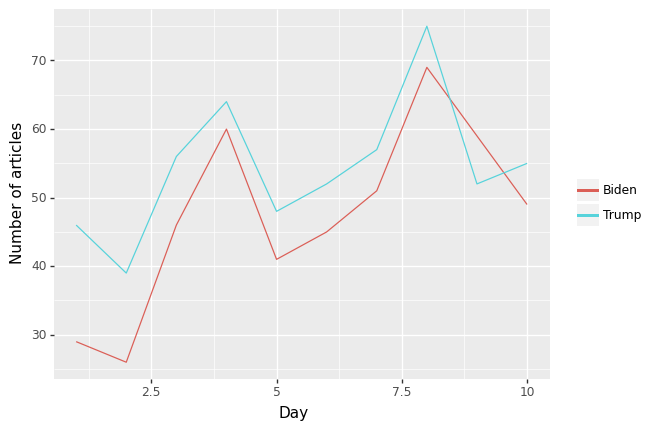

<ggplot: (8780585282289)>

In [70]:
import plotnine as p9
(
    p9.ggplot(df, p9.aes(x='day',y='value',color='variable')) + 
        p9.geom_line() + 
    p9.labs(color='',x='Day',y='Number of articles')
)

What are some ways this analysis could be improved?

* Check that articles about "Trump" and "Biden" are actually about the two candidates. Some may be about other things -- the English word "trump", "Hunter Biden", etc...
* Check whether the API searches article text or just article titles.
* Use more sources, and use American newspapers (unless the goal was to analyze international news).
* Make visualizations.
* Use a larger time window.
* Use other kinds of data (e.g., poll results) to look for relationships.

Collecting and cleaning data takes a lot of very technical work, but it's only the first step in the analysis. When you finish data collection and cleaning, it can feel like you're finally done. Take a moment to congratulate yourself and step away from the data, so that when you come back you'll be ready to do a careful statistical analysis.

### OAuth

[OAuth](https://en.wikipedia.org/wiki/OAuth) is a way to give an application access to data on a website or web API.

You might run into OAuth if you use a web API where the data is private. For instance, Twitter provides a [web API](https://developer.twitter.com/en/docs.html) for managing your personal Twitter account. If you want to access the API from a Python script, first you have to use OAuth to tell Twitter that the script has permission to use your data.

OAuth can operate in several different ways. As always, check the documentation for the web API you want to use in order to find out what you need to do.

The simplest case of OAuth requires scripts to have a key or token from the web API provider. This is very similar to using an API key.

For more complicated cases, the `requests-ouathlib` package ([docs](https://requests-oauthlib.readthedocs.io/en/latest/)) may help.

### Summary 

- Third parties provide access to their data bases via APIs
- Check API documentation to assemble a valid query
- You are a guest, be polite! 